In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

global num_steps
num_steps = 5000
h = 0.01

<h1>Velocity Verlet's Method</h1>

<p>Let's state as a reminder the velocity verlet algorithm. 
    $$ x[n+1] = x[n] + h x'[n] + \frac{h^2}{2} x''[n]$$
    $$ v[n+1] = v[n] + \frac{h}{2} \big( x''[n+1] - x''[n]\big)$$
</p>

Now let's try to do the calculations for this method together for the harmonic oscillator as the simple exercise. This time let's try to code it in a way it is easier to understand.

In [2]:
def a_ho(k,m,x):
    return (-k/m)*x

def x_update(x,v,a,h):
    x_updated = x + h*v + (h**2/2)*a
    return x_updated

def v_update(v,a_updated,a,h):
    v_updated = v + (h/2)*(a_updated+a)
    return v_updated

In [3]:
def ho_velocity_verlet(k,m):
    
    # Let's start by defining our variables in a discrete manner
    t = np.linspace(0, num_steps*h, num_steps+1)
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)
    a = np.zeros(num_steps+1)


    # Initial conditions
    x[0] = 0
    v[0] = 1
    a[0] = a_ho(k,m,x[0])
    
    # The Verlet Step
    for n in np.arange(num_steps):
        #x[n+1] = x_update(x[n],v[n],a_ho(k,m,x[n]),h)
        x[n+1] = x_update(x[n],v[n],a[n],h)
        a[n+1] = a_ho(k,m,x[n+1])
        v[n+1] = v_update(v[n],a[n+1],a[n],h)

    # Plotting the result 
    plt.plot(t,x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()
    return t,x,v,a


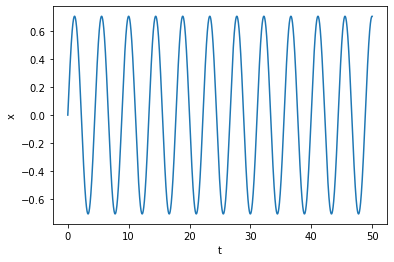

In [4]:
#t,x,v,a = ho_velocity_verlet(2,1)
k=2; m=1
t,x,v,a = ho_velocity_verlet(k,m)

Can we see how the energy evolves?

In [5]:
def total_energy(v,x,k,m):
    kinetic = (1/2)*m*v**2
    potential = (1/2)*k*x**2
    return kinetic+potential

(0.49, 0.51)

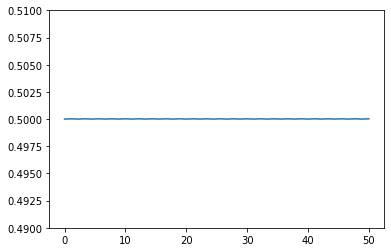

In [6]:
#plt.plot(t,total_energy(v,x,1,1))
#plt.yticks(range(-3, 4))
plt.plot(t,total_energy(v,x,k,m))
plt.ylim(.49,.51)


In [7]:
def ho_energies(v,x,k,m):
    kinetic = 0.5*m*v**2
    potential = 0.5*k*x**2
    return np.array([kinetic,potential,kinetic+potential]).T

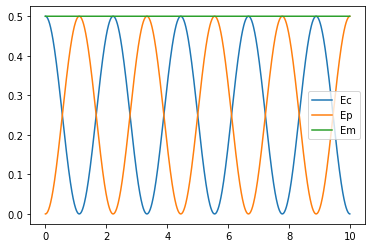

In [8]:
nrj= ho_energies(v,x,k,m)
#plt.plot(t,ho_energies(v,x,k,m))
plt.plot(t[:1000],nrj[:1000])
plt.legend(['Ec','Ep','Em'])

<h3>Why does the energy oscillates when we know this is a conservative system where the energy must be a constant?</h3>

(...)